In this study, we use percolation theory as an analogy to explore the behavior of microtubule-kinesin active matter systems. The goal is to understand how the properties of the system, specifically the length of the microtubules, affect the formation of giant components, which could provide insights into the overall connectivity and functionality of the system. The mean of the log-normal distribution represents the average size of the microtubules, while the standard deviation corresponds to the variability in microtubule lengths, with larger values indicating a wider range of microtubule sizes, including longer ones. By using a random graph model and varying the edge probabilities according to a log-normal distribution, we simulate the various conditions that can arise in the microtubule-kinesin system, where a higher edge probability corresponds to a longer microtubule with a greater chance of forming a giant component.

To investigate this problem, the following steps are performed in the code:

1. Define functions to generate edge probabilities using a log-normal distribution, create random graphs based on the provided mean and standard deviation, and calculate the giant component ratio in the graph. The giant component ratio is the ratio of the largest connected component's size to the total number of nodes in the graph.

2. Set up the parameters for the graph, such as the number of nodes (n) and the connection probability (p). Specify a range of mean and standard deviation values for the log-normal distribution to explore the impact of these parameters on the formation of giant components.

3. Calculate the average giant component ratio for each combination of mean and standard deviation values by generating graphs, analyzing the graphs to find the giant component ratio, and taking the average over multiple trials. This step provides a comprehensive view of how the giant component ratio changes under different conditions.

4. Create a phase diagram to visualize the relationship between the mean and standard deviation of the log-normal distribution and the average giant component ratio. This plot helps to identify trends and critical points where the formation of giant components becomes more likely.

5. Generate graphs with a fixed mean value and varying standard deviation values. Calculate the giant component ratios and their standard deviations for each graph, and plot a few representative graphs to visualize the effect of changing the standard deviation. This step allows for a more detailed examination of the system's behavior under specific conditions.

6. Create a line plot with shaded error regions to display the relationship between the standard deviation of the log-normal distribution and the giant component ratio. Draw a vertical line indicating the point at which the giant component ratio reaches 1.0, which helps to identify the critical standard deviation value at which the graph becomes highly connected.

By following these steps, the code provides a detailed analysis of the microtubule-kinesin active matter system using a percolation theory-based analogy. The phase diagram and line plot reveal the conditions that favor the emergence of giant components, highlighting the role of microtubule length and the variability in microtubule sizes in determining the overall connectivity and functionality of the system. This analysis can help researchers better understand the behavior of such systems, enabling them to make more informed decisions when designing experiments or engineering applications that rely on the interconnectedness of microtubule-kinesin active matter systems.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd
import random
from numba import jit, prange
import cProfile
from multiprocessing import Pool
from scipy.stats import gamma




#### Define functions to generate edge probabilities using a log-normal distribution, create random graphs based on the provided mean and standard deviation, and calculate the giant component ratio in the graph. The giant component ratio is the ratio of the largest connected component's size to the total number of nodes in the graph.

In [26]:
# Define a function to generate edge probabilities using a log-normal distribution
# def edge_probability_distribution(mean, std_dev):
#     return np.random.lognormal(mean, std_dev)

def edge_probability_distribution(shape, scale):
    return np.random.gamma(shape, scale)



# Define a function to generate a random graph with n nodes, based on the provided mean, standard deviation, and connection probability p
def generate_graph(n, shape, scale, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i+1, n):
            edge_prob = edge_probability_distribution(shape, scale)
            if edge_prob > p:  # Change this line
                G.add_edge(i, j)
    return G

# Define a function to analyze the graph and calculate the giant component ratio

def analyze_graph(G):
    giant_component_ratio = 0
    
    for component in nx.connected_components(G):
        if len(component) > giant_component_ratio:
            giant_component_ratio = len(component)

    return giant_component_ratio / G.number_of_nodes()





In [27]:
def generate_microtubule_lengths(shape, scale, total_length):
    # Initialize the lengths list and the current total length
    lengths = []
    current_total_length = 0

    # Keep generating lengths until the current total length is less than the desired total length
    while current_total_length < total_length:
        # Generate a new length
        new_length = np.random.gamma(shape, scale)
        
        # If adding the new length doesn't exceed the total length, add it to the lengths
        if current_total_length + new_length <= total_length:
            lengths.append(new_length)
            current_total_length += new_length
        else:
            # If adding the new length would exceed the total length, add a length that will make the current total length equal to the total length
            lengths.append(total_length - current_total_length)
            break

    return np.array(lengths)


In [28]:
shape = 2
scale = 1
total_length = 1000

lengths = generate_microtubule_lengths(shape, scale, total_length)

print(lengths)
print(np.sum(lengths))  # This should be equal to total_length


[ 0.43285026  1.19216847  1.13216932  3.85743682  1.75193173  3.41941053
  6.09438176  1.85340722  2.54498146  1.64401588  0.36212699  0.83677486
  0.10944183  0.59328011  4.3628419   1.99133895  1.28024215  0.64150457
  0.94529262  1.05904538  1.8456001   1.26685361  1.3647844   0.79414697
  0.47812875  3.84147023  1.16069079  1.2140198   2.90967831  2.37664628
  2.2174295   1.28425556  2.95489108  1.33861854  3.02525184  1.12001423
  1.95177268  0.91030011  1.64808836  0.86230889  1.83717045  0.33775017
  1.23718679  0.94346379  3.41528021  0.85876269  2.78024013  2.73837661
  2.875991    0.69269615  0.72362885  0.68446265  1.37018102  1.01432028
  1.89386786  2.36586578  0.34509782  1.72520625  2.45866186  1.299458
  2.08353963  2.53584719  1.14933115  3.55222191  2.72077926  0.76367135
  2.77696949  1.94218133  4.31907352  2.33507398  1.98600072  0.33017781
  2.00593867  3.90120129  3.3760112   4.3632325   4.83574621  3.40346599
  3.0304792   2.45217967  6.23307656  1.14494908  3.6

#### Calculate the average giant component ratio for each combination of mean and standard deviation values by generating graphs, analyzing the graphs to find the giant component ratio, and taking the average over multiple trials. This step provides a comprehensive view of how the giant component ratio changes under different conditions.

In [54]:
# Parameters
n = 100
p = 9
shape_values = np.linspace(0.1, 7, 50)
scale_values = np.linspace(0.1, 7, 50)

# Calculate the average giant component ratio for each combination of mean and standard deviation values

heatmap_data = np.zeros((len(shape_values), len(scale_values)))

for i, mean in enumerate(shape_values):
    for j, std_dev in enumerate(scale_values):
        ratios = []
        for _ in range(5):
            G = generate_graph(n, mean, std_dev, p)
            giant_component_ratio = analyze_graph(G)
            ratios.append(giant_component_ratio)
        
        avg_ratio = np.mean(ratios)
        heatmap_data[i, j] = avg_ratio

In [55]:
scale_values

array([0.1       , 0.24081633, 0.38163265, 0.52244898, 0.66326531,
       0.80408163, 0.94489796, 1.08571429, 1.22653061, 1.36734694,
       1.50816327, 1.64897959, 1.78979592, 1.93061224, 2.07142857,
       2.2122449 , 2.35306122, 2.49387755, 2.63469388, 2.7755102 ,
       2.91632653, 3.05714286, 3.19795918, 3.33877551, 3.47959184,
       3.62040816, 3.76122449, 3.90204082, 4.04285714, 4.18367347,
       4.3244898 , 4.46530612, 4.60612245, 4.74693878, 4.8877551 ,
       5.02857143, 5.16938776, 5.31020408, 5.45102041, 5.59183673,
       5.73265306, 5.87346939, 6.01428571, 6.15510204, 6.29591837,
       6.43673469, 6.57755102, 6.71836735, 6.85918367, 7.        ])

#### Create a phase diagram to visualize the relationship between the mean and standard deviation of the log-normal distribution and the average giant component ratio. This plot helps to identify trends and critical points where the formation of giant components becomes more likely.

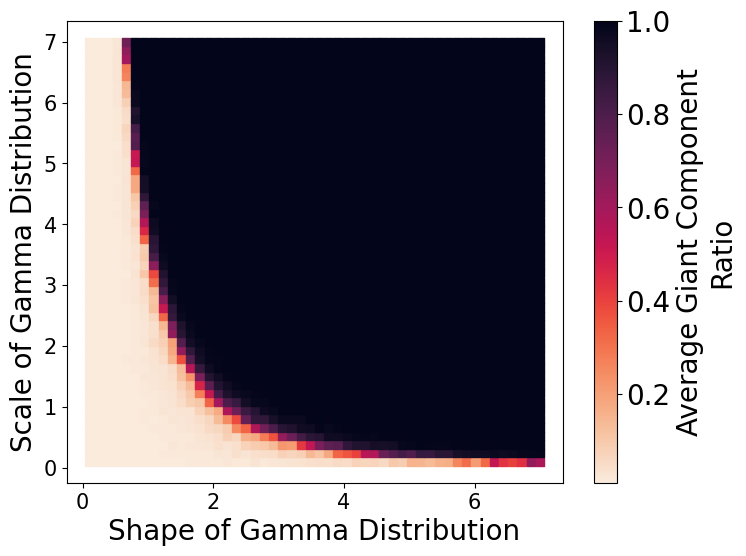

In [73]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(shape_values, scale_values)
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r, marker='s')
plt.xlabel('Shape of Gamma Distribution', fontsize=20)
plt.ylabel('Scale of Gamma Distribution', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
cb.set_label(label='Average Giant Component\nRatio', size=20)

plt.show()


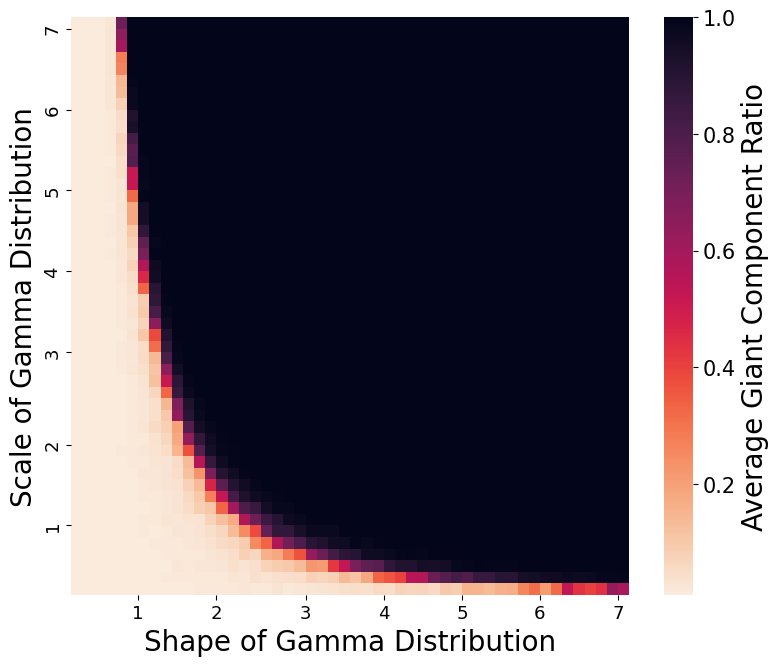

In [77]:
heatmap_df = pd.DataFrame(heatmap_data, index=np.round(shape_values, 1), columns=np.round(scale_values, 1))

fig, ax = plt.subplots(figsize=(9,7.5))
fig.patch.set_facecolor('white')

ax = sns.heatmap(heatmap_df, cmap=sns.cm.rocket_r, cbar_kws={'label': 'Average Giant Component Ratio'})
ax.invert_yaxis()
ax.set_xlabel('Shape of Gamma Distribution', fontsize=20)
ax.set_ylabel('Scale of Gamma Distribution', fontsize=20)

custom_ticks = np.arange(1, 8, 1)  # ticks from 1 to 7

# Function to find the closest index of a value in an array
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Find the corresponding indices for custom_ticks in shape_values and scale_values
xtick_locs = [find_nearest_idx(shape_values, tick) for tick in custom_ticks]
ytick_locs = [find_nearest_idx(scale_values, tick) for tick in custom_ticks]

# Set the xticks and yticks at the corresponding indices
ax.set_xticks(xtick_locs)
ax.set_xticklabels(custom_ticks, fontsize=13)
ax.set_yticks(ytick_locs)
ax.set_yticklabels(custom_ticks, fontsize=13)




ax.figure.axes[-1].yaxis.label.set_size(20)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.show()


#### Generate graphs with a fixed mean value and varying standard deviation values. Calculate the giant component ratios and their standard deviations for each graph, and plot a few representative graphs to visualize the effect of changing the standard deviation. This step allows for a more detailed examination of the system's behavior under specific conditions.

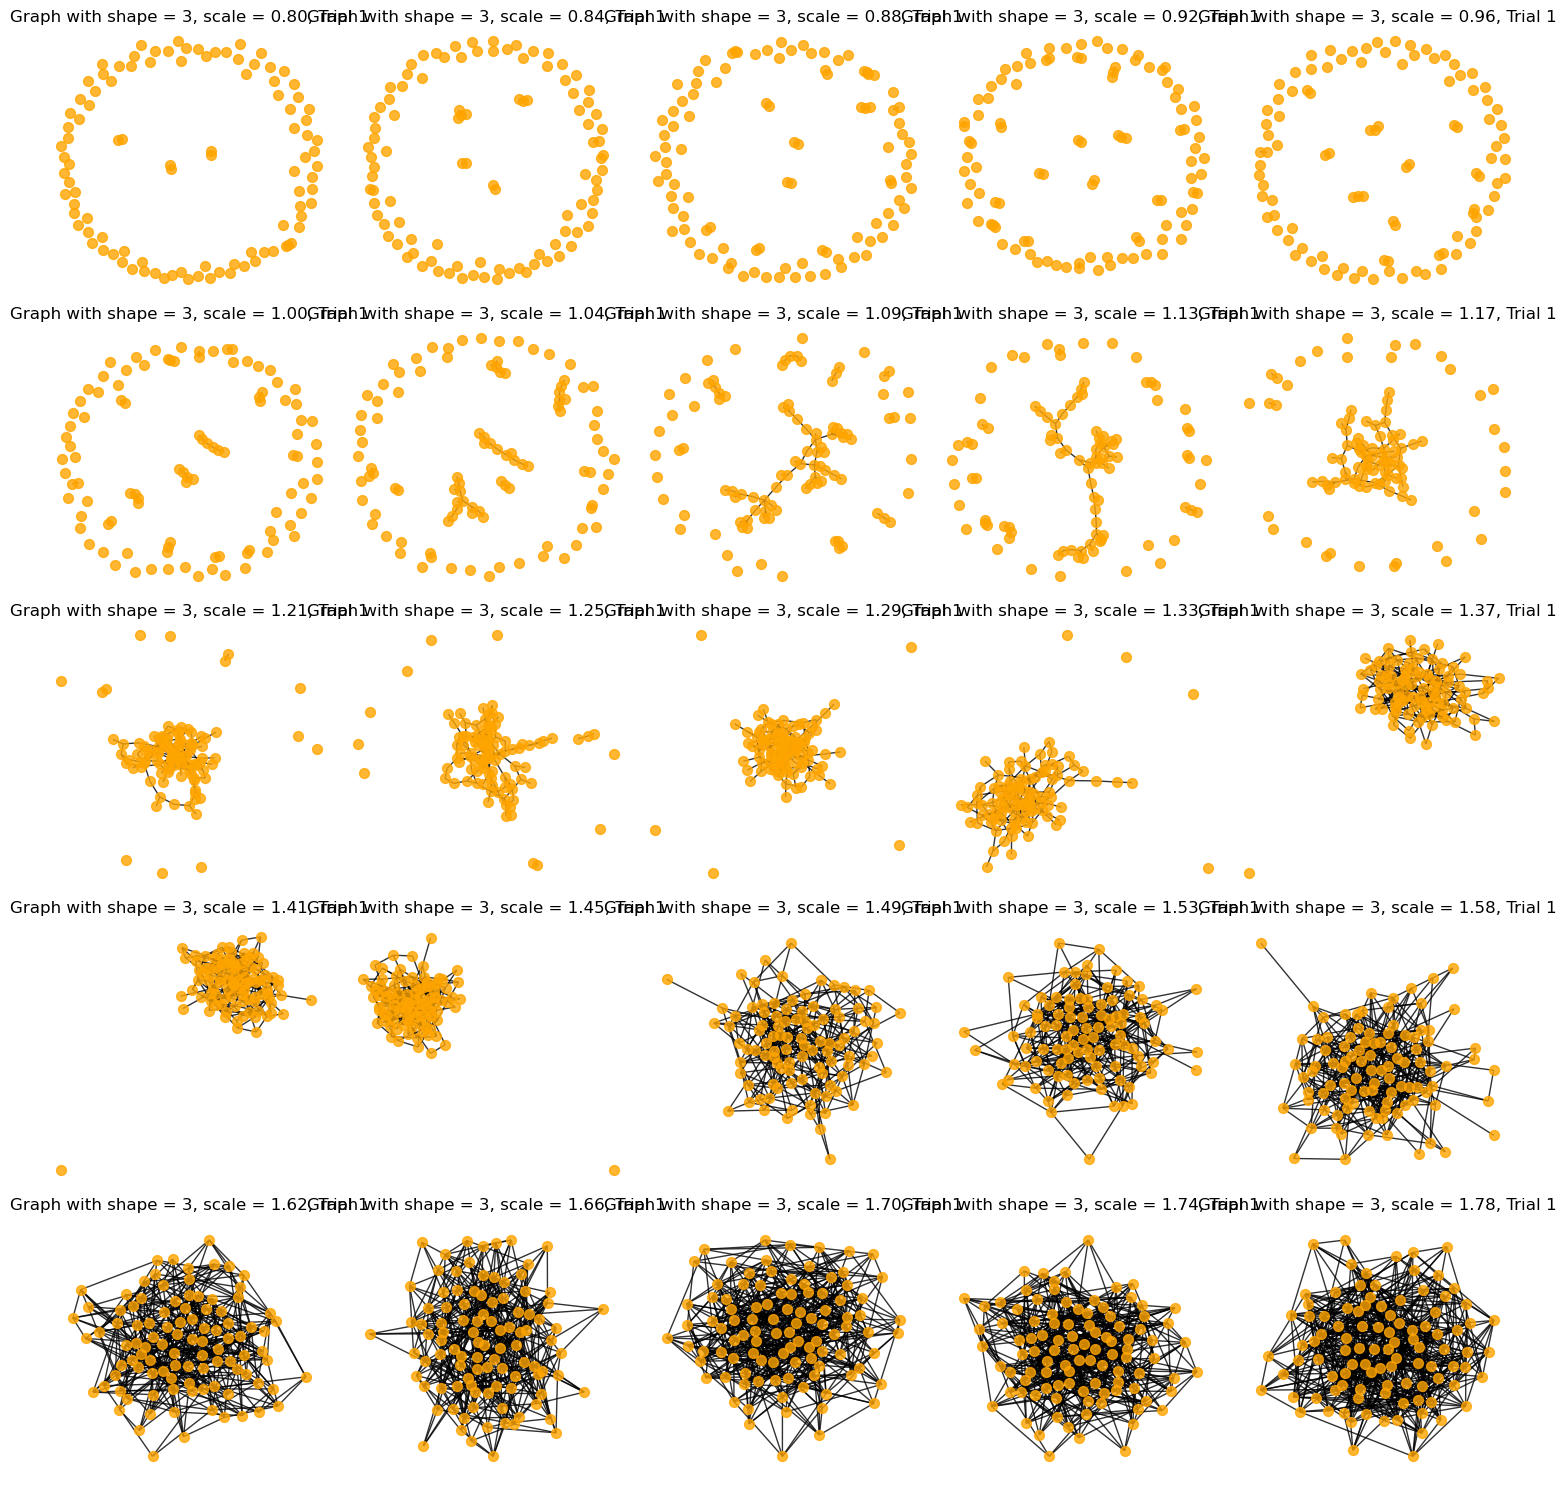

In [31]:
# Generate the average giant component ratios

shape = 3  # fixed shape for gamma
scale_values = np.linspace(0.8, 1.8, 50)  # for scale in gamma

n_plots = len(scale_values) // 2  # Use integer division here
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

avg_ratios = []
std_devs = []

for j, scale in enumerate(scale_values):
    ratios = []
    for i in range(100):
        G = generate_graph(n, shape, scale, p)
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
        if i == 0 and j % 2 == 0:  
            row, col = (j // 2) // ncols, (j // 2) % ncols
            ax = axes[row, col]
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with shape = {shape}, scale = {scale:.2f}, Trial {i+1}')
            ax.axis('off')
    avg_ratio = np.mean(ratios)
    std_dev_ratio = np.std(ratios)
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev_ratio)

avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Adjust layout
plt.tight_layout()
plt.show()


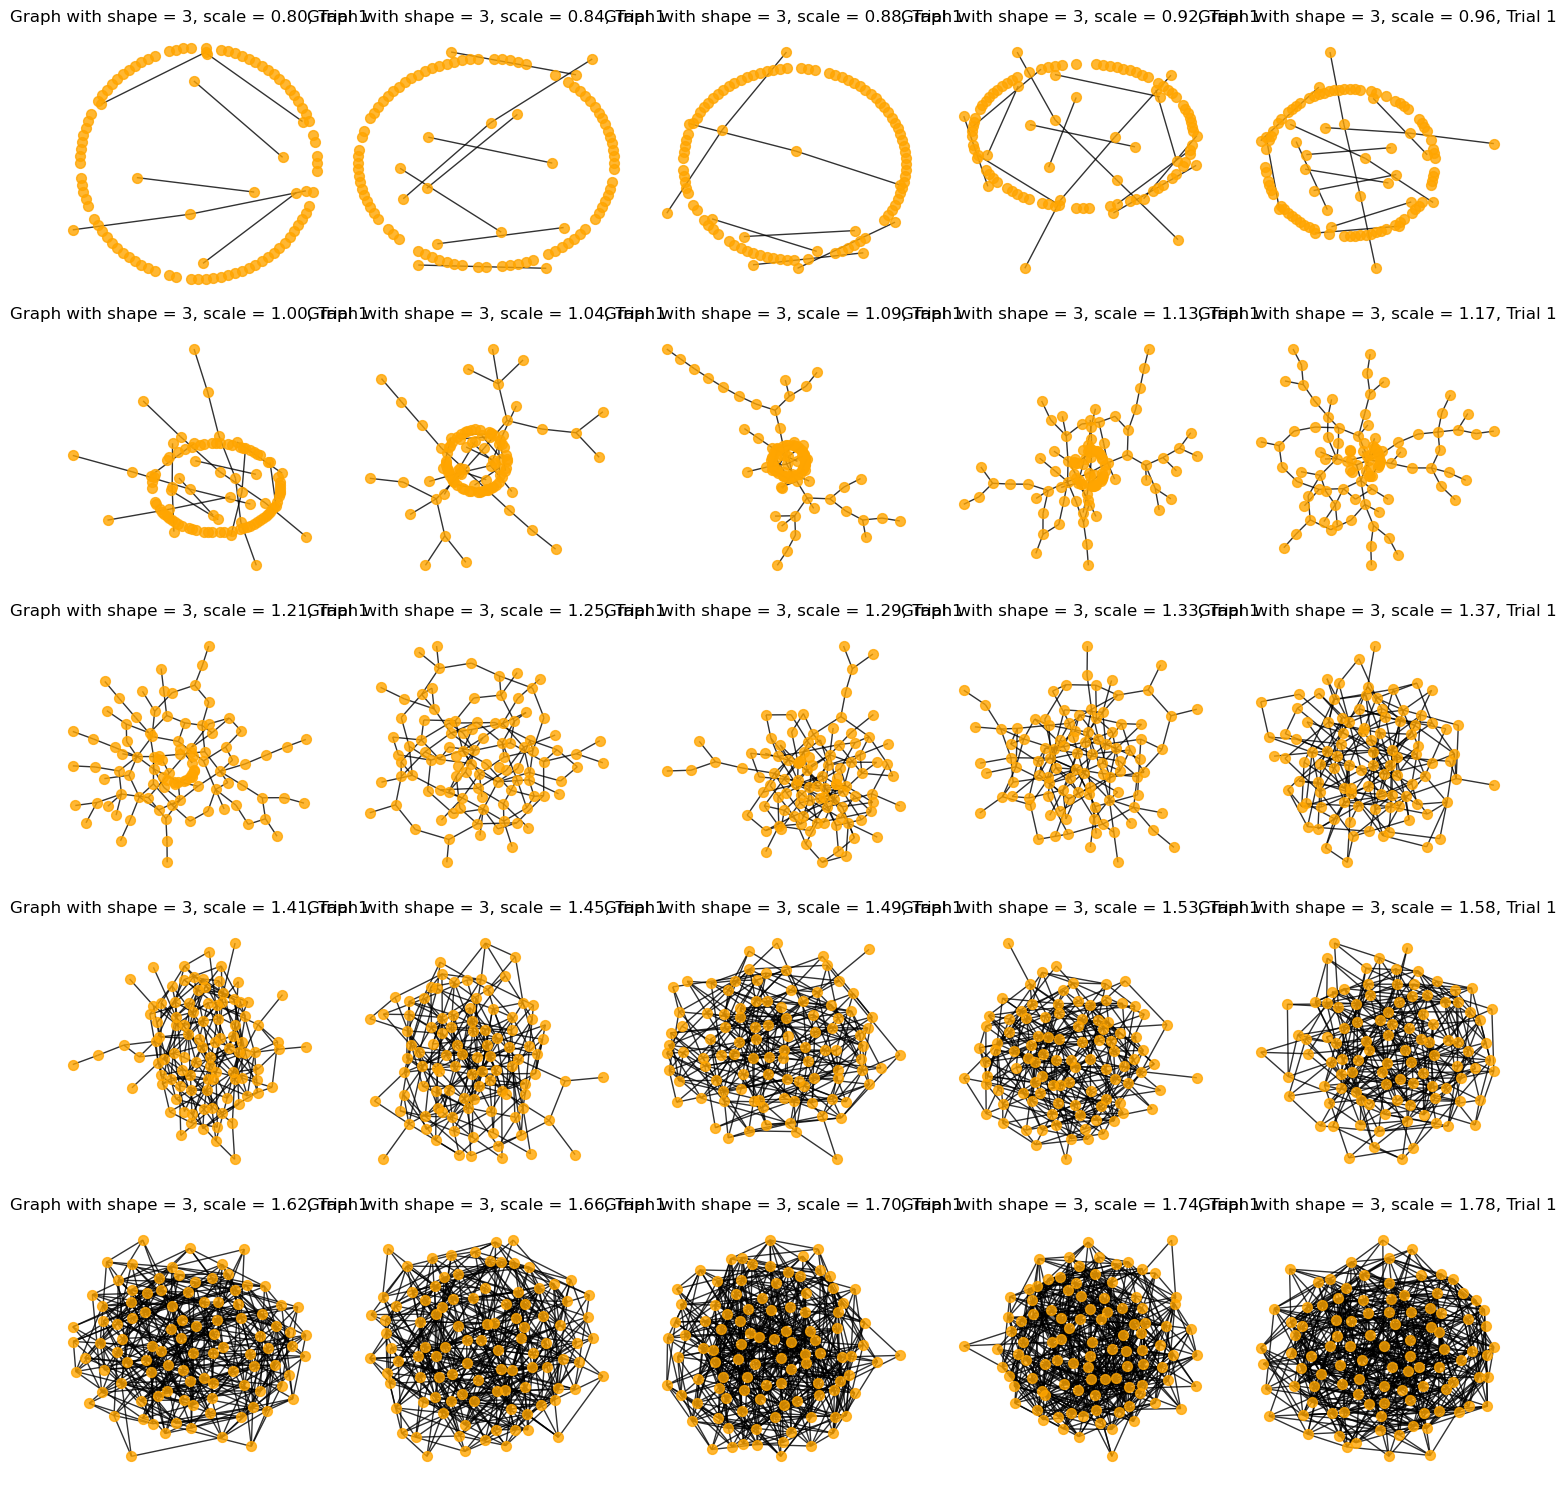

In [32]:
# Generate the average giant component ratios

shape = 3  # fixed shape for gamma
scale_values = np.linspace(0.8, 1.8, 50)  # for scale in gamma

n_plots = len(scale_values) // 2  # Use integer division here
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

avg_ratios = []
std_devs = []

for j, scale in enumerate(scale_values):
    ratios = []
    for i in range(100):
        G = generate_graph(n, shape, scale, p)
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
        if i == 0 and j % 2 == 0:  
            row, col = (j // 2) // ncols, (j // 2) % ncols
            ax = axes[row, col]
            pos = nx.kamada_kawai_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with shape = {shape}, scale = {scale:.2f}, Trial {i+1}')
            ax.axis('off')
    avg_ratio = np.mean(ratios)
    std_dev_ratio = np.std(ratios)
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev_ratio)

avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Adjust layout
plt.tight_layout()
plt.show()


#### Create a line plot with shaded error regions to display the relationship between the standard deviation of the log-normal distribution and the giant component ratio. Draw a vertical line indicating the point at which the giant component ratio reaches 1.0, which helps to identify the critical standard deviation value at which the graph becomes highly connected.

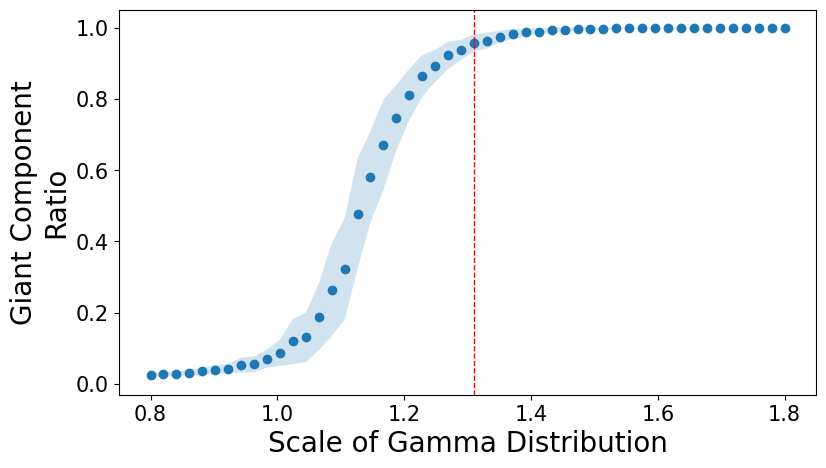

In [51]:
# Assuming you've stored the standard deviations of the giant component ratios in an array named `giant_comp_stddevs`

# Find the index where the giant component ratio reaches 1.0
index_1 = np.argmax(avg_ratios >= 0.95)

# Get the corresponding scale value
scale_1 = scale_values[index_1]

# Create a line plot with shaded error regions
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(scale_values, avg_ratios, 'o')
ax.fill_between(scale_values, avg_ratios - std_devs, avg_ratios + std_devs, alpha=0.2)

# Draw a vertical line when the giant component ratio reaches 1.0
ax.axvline(scale_1, color='red', linestyle='--',  linewidth=1)
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('Scale of Gamma Distribution', fontsize=20)
ax.set_ylabel('Giant Component\nRatio', fontsize=20)
plt.show()


# Clamping 

In [4]:
# Parameters
total_length = 1000  # total length of the microtubules
shape_values = np.linspace(0.1, 7, 50)
scale_values = np.linspace(0.1, 7, 50)
heatmap_data = np.load('heatmap_data_ppf.npy')


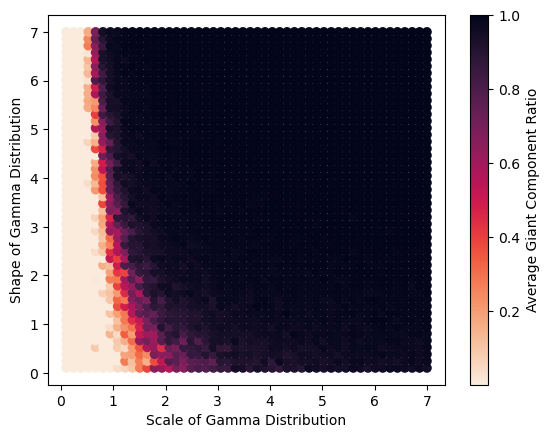

In [5]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(scale_values, shape_values)
plt.figure()
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Shape of Gamma Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

In [6]:
import pickle

# Load the data
with open('network_plot_data_kk.pkl', 'rb') as f:
    plot_data = pickle.load(f)

# Separate the data into different arrays
shape_values, scale_values, avg_ratios, std_devs, graph_data = zip(*plot_data)

# Convert to numpy arrays for easier manipulation
shape_values = np.array(shape_values)
scale_values = np.array(scale_values)
avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)


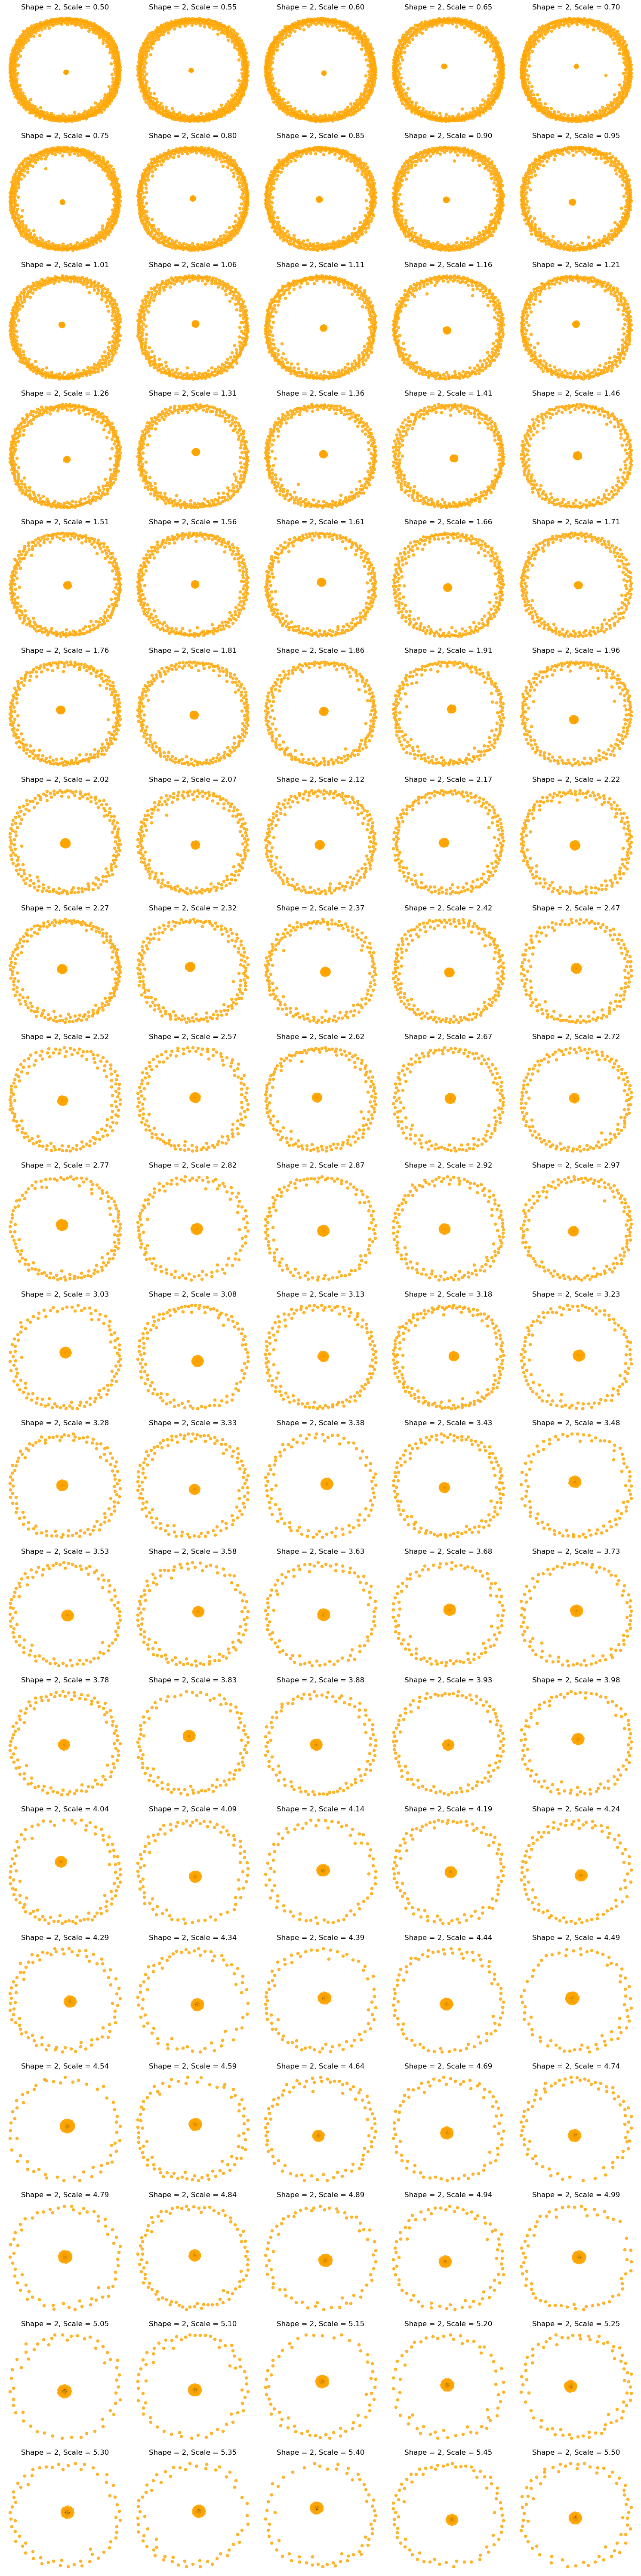

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import numpy as np

# Load the data
with open('network_plot_data_kk_v4.pkl', 'rb') as f:
    plot_data = pickle.load(f)

# Separate the data into different arrays
shape_values, scale_values, avg_ratios, std_dev_ratios, avg_nodes, avg_edges, graph_data = zip(*plot_data)

# Convert to numpy arrays for easier manipulation
shape_values = np.array(shape_values)
scale_values = np.array(scale_values)
avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Determine the number of plots
n_graphs = len(scale_values)
ncols = 5
nrows = int(np.ceil(n_graphs / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

# Flatten the axes array in case it's 2D
axes = axes.flatten()

for i in range(n_graphs):
    ax = axes[i]
    G, _ = graph_data[i][0]  # The first trial's graph data
    
    # Calculate the number of nodes in the graph
    n = G.number_of_nodes()

    # Calculate the k factor based on the number of node    
    # Generate the spring layout using the calculated k factor
    pos = nx.spring_layout(G)
    
    nx.draw_networkx(G, pos, node_color='orange', node_size=20, with_labels=False, alpha=0.8, ax=ax)
    ax.set_title(f'Shape = {shape_values[i]}, Scale = {scale_values[i]:.2f}')
    ax.axis('off')

# Hide remaining axes if they exist
for j in range(n_graphs, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


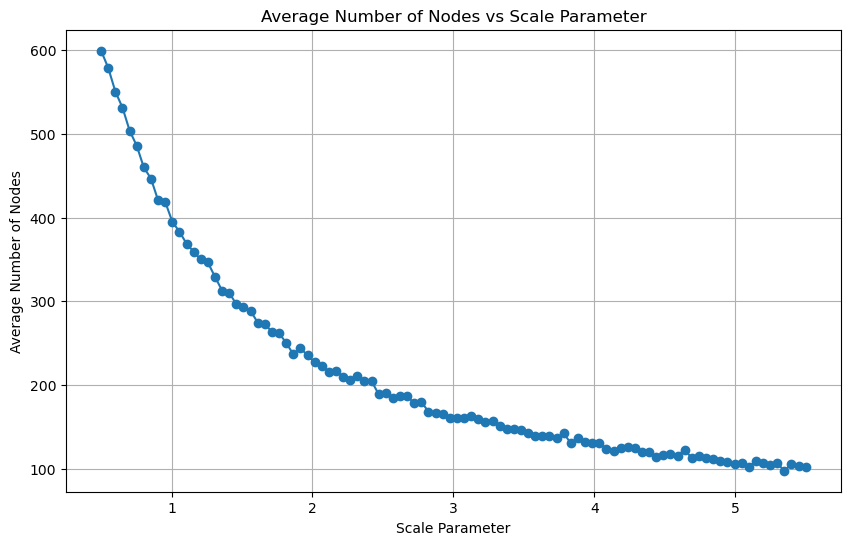

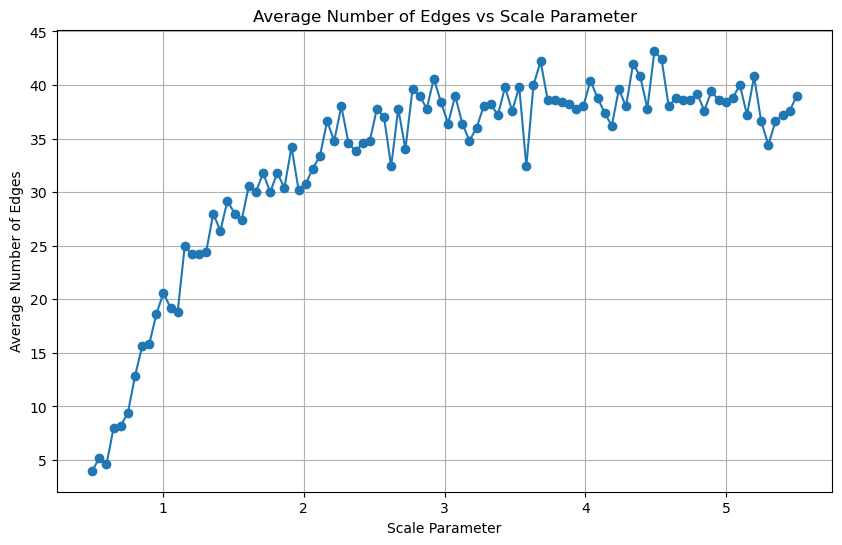

In [22]:
# Plot average nodes
plt.figure(figsize=(10, 6))
plt.plot(scale_values, avg_nodes, 'o-')
plt.xlabel('Scale Parameter')
plt.ylabel('Average Number of Nodes')
plt.title('Average Number of Nodes vs Scale Parameter')
plt.grid(True)
plt.show()

# Plot average edges
plt.figure(figsize=(10, 6))
plt.plot(scale_values, avg_edges, 'o-')
plt.xlabel('Scale Parameter')
plt.ylabel('Average Number of Edges')
plt.title('Average Number of Edges vs Scale Parameter')
plt.grid(True)
plt.show()

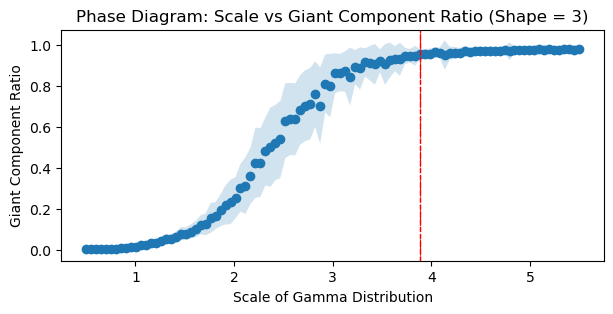

In [83]:
# Find the index where the giant component ratio reaches 1.0
index_1 = np.argmax(avg_ratios >= 0.95)

# Get the corresponding scale value
scale_1 = scale_values[index_1]

# Create a line plot with shaded error regions
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(scale_values, avg_ratios, 'o')
ax.fill_between(scale_values, avg_ratios - std_devs, avg_ratios + std_devs, alpha=0.2)

# Draw a vertical line when the giant component ratio reaches 1.0
ax.axvline(scale_1, color='red', linestyle='--', linewidth=0.8)
ax.axvline(scale_1, color='red', linestyle='--',  linewidth=1)

ax.set_xlabel('Scale of Gamma Distribution')
ax.set_ylabel('Giant Component Ratio')
ax.set_title('Phase Diagram: Scale vs Giant Component Ratio (Shape = 3)')
plt.show()


In [13]:
@jit
def generate_microtubule_lengths(shape, scale, total_length):
    lengths = []
    current_total_length = 0.0

    # Calculate the CDF at the truncation points
    cdf_low = gamma.cdf(1, shape, scale=scale)
    cdf_high = gamma.cdf(25, shape, scale=scale)

    while current_total_length < total_length:
        # Generate uniform random number between cdf_low and cdf_high
        u = np.random.uniform(cdf_low, cdf_high)

        # Convert back into gamma distribution using the ppf
        new_length = round(gamma.ppf(u, shape, scale=scale), 1)

        if current_total_length + new_length <= total_length:
            lengths.append(new_length)
            current_total_length += new_length
        else:
            new_length = total_length - current_total_length
            if new_length >= 1:
                lengths.append(new_length)
                break
            else:
                break
    return np.array(lengths)

In [17]:
a = generate_microtubule_lengths(3, 1, 1000)
len(a)

318

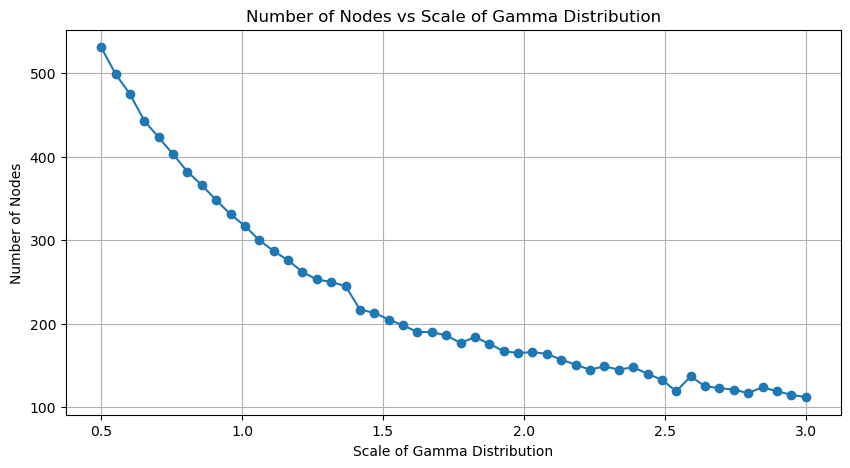

In [54]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load the data
with open('network_plot_data.pkl', 'rb') as f:
    plot_data = pickle.load(f)

# Separate the data into different arrays
shape_values, scale_values, avg_ratios, std_devs, graph_data = zip(*plot_data)

# Convert to numpy arrays for easier manipulation
shape_values = np.array(shape_values)
scale_values = np.array(scale_values)

# Extract number of nodes for each graph
# Extract number of nodes for each graph
node_counts = [graph[0][0].number_of_nodes() for graph in graph_data]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(scale_values, node_counts, marker='o')
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes vs Scale of Gamma Distribution')
plt.grid(True)
plt.show()
